**Checking step functions can approximate sinusoidal functions**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../..")

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
from wobble.pure import PureMA
num_modes=5
ma=PureMA('Double_RB', 3,
                 mesh_file='../sample_data_files/mesh_files/double_beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                 num_modes=num_modes,
                 force_path='../sample_data_files/force_files/pure_rotation_dub_100.txt')
ma.initialize_model()
overload_bc_dicts=[{'type': 'FixedValue', 'value': 0.0, 'axis': 'x', 'group': 'left'},
                    {'type': 'FixedValue', 'value': 0.0, 'axis': 'y', 'group': 'left'},
                    {'type': 'FixedValue', 'value': 0.0, 'axis': 'z', 'group': 'left'}]
ma.assemble_stiffness(overload_bc_dicts = overload_bc_dicts)
ma.assemble_mass()
ma.find_eigenmodes()
ma.project_initial_displacement()
ma.project_initial_velocity()

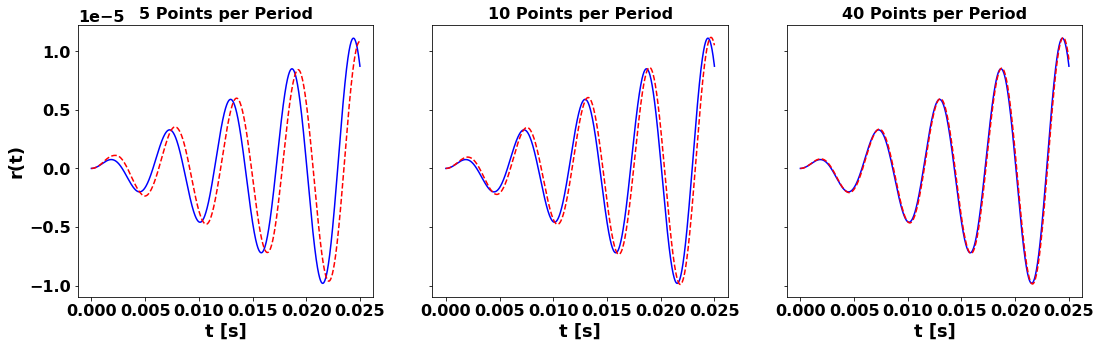

In [30]:
fig,ax=plt.subplots(1, 3, figsize=(18,5), sharey=True)
res=True
vals=[5,10,40]
for i in range(3):
    pts_per_period=vals[i]
    node_of_interest = 4
    if res==True:
        freq = ma.omega[node_of_interest]
    else:
        freq=400
    a,b=0,0.025
    period=np.pi*2/freq
    no_periods=(b-a)/period

    no_points = round(pts_per_period*no_periods)
    time_array = np.linspace(a,b, no_points)
    force_array = np.zeros([num_modes, no_points])
    force_array[node_of_interest, :] = np.cos(freq*time_array)

    ma.project_force(force_array=force_array, force_times=time_array)

    ma.solve_step_loading()
    plot_array = np.linspace(a,b, 1000)
    ma.get_r_and_r_dot(plot_array)
    w=ma.omega[node_of_interest]
    plot_array = np.linspace(a,b, 9000)
    if res==False:
        #non-resonance
        analytic=1/(w**2-freq**2)*np.cos(freq*plot_array)-1/(w**2-freq**2)*np.cos(w*plot_array)
    if res==True:
        #resonance
        analytic=plot_array/(2*w)*np.sin(plot_array*w)

    
    ax[i].plot(plot_array, analytic, 'b-', label="Analytic")
    ax[i].plot(ma.time_array, ma.r[node_of_interest], 'r--', label="Numerical")
    ax[i].set_title('{} Points per Period'.format(pts_per_period), fontweight="bold")
    ax[i].set_xlabel('t [s]')
    ax[0].set_ylabel('r(t)')
    #plt.legend()
    if res==True:
        #plt.savefig('res_stepfunc.png'.format(pts_per_period), bbox_inches='tight')
        pass
    else:
        #plt.savefig('nores_stepfunc.png'.format(pts_per_period), bbox_inches='tight')
        pass
plt.show()

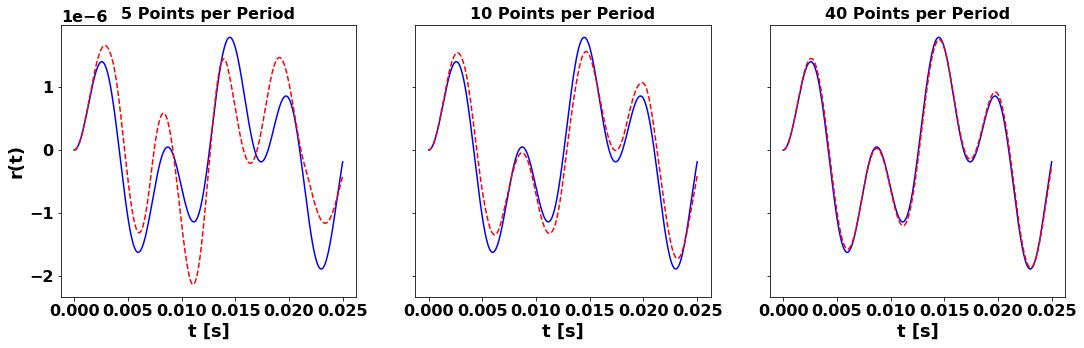

In [31]:
fig,ax=plt.subplots(1, 3, figsize=(18,5), sharey=True)
res=False
vals=[5,10,40]
for i in range(3):
    pts_per_period=vals[i]
    node_of_interest = 4
    if res==True:
        freq = ma.omega[node_of_interest]
    else:
        freq=400
    a,b=0,0.025
    period=np.pi*2/freq
    no_periods=(b-a)/period

    no_points = round(pts_per_period*no_periods)
    time_array = np.linspace(a,b, no_points)
    force_array = np.zeros([num_modes, no_points])
    force_array[node_of_interest, :] = np.cos(freq*time_array)

    ma.project_force(force_array=force_array, force_times=time_array)

    ma.solve_step_loading()
    plot_array = np.linspace(a,b, 1000)
    ma.get_r_and_r_dot(plot_array)
    w=ma.omega[node_of_interest]
    plot_array = np.linspace(a,b, 9000)
    if res==False:
        #non-resonance
        analytic=1/(w**2-freq**2)*np.cos(freq*plot_array)-1/(w**2-freq**2)*np.cos(w*plot_array)
    if res==True:
        #resonance
        analytic=plot_array/(2*w)*np.sin(plot_array*w)

    
    ax[i].plot(plot_array, analytic, 'b-', label="Analytic")
    ax[i].plot(ma.time_array, ma.r[node_of_interest], 'r--', label="Numerical")
    ax[i].set_title('{} Points per Period'.format(pts_per_period), fontweight="bold")
    ax[i].set_xlabel('t [s]')
    ax[0].set_ylabel('r(t)')
    #plt.legend()
    if res==True:
        #plt.savefig('res_stepfunc.png'.format(pts_per_period), bbox_inches='tight')
        pass
    else:
        #plt.savefig('nores_stepfunc.png'.format(pts_per_period), bbox_inches='tight')
        pass
plt.show()

In [32]:
print(ma.omega[node_of_interest])

1096.1012991479456


1096.1012991479456


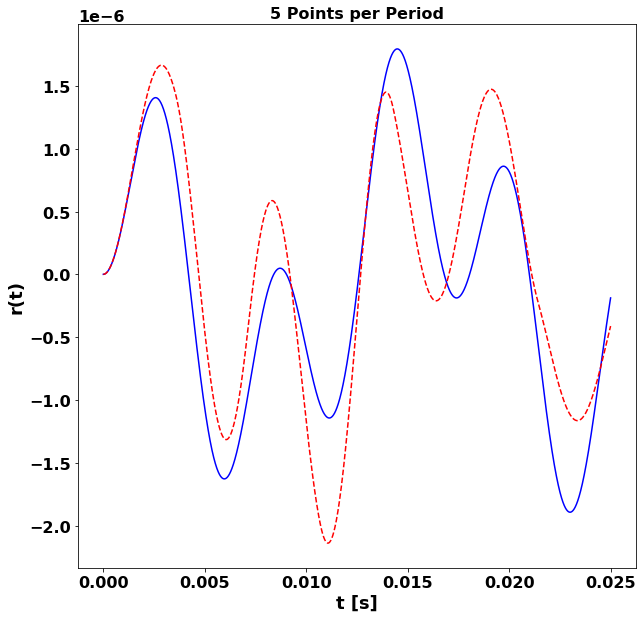

1096.1012991479456


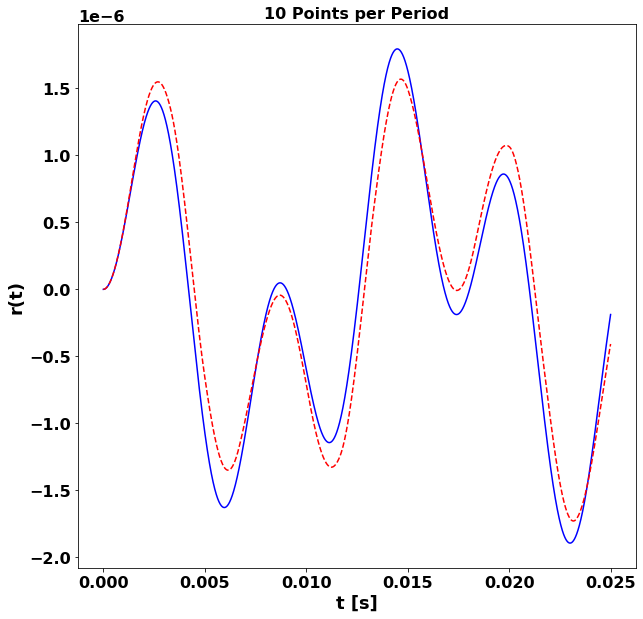

1096.1012991479456


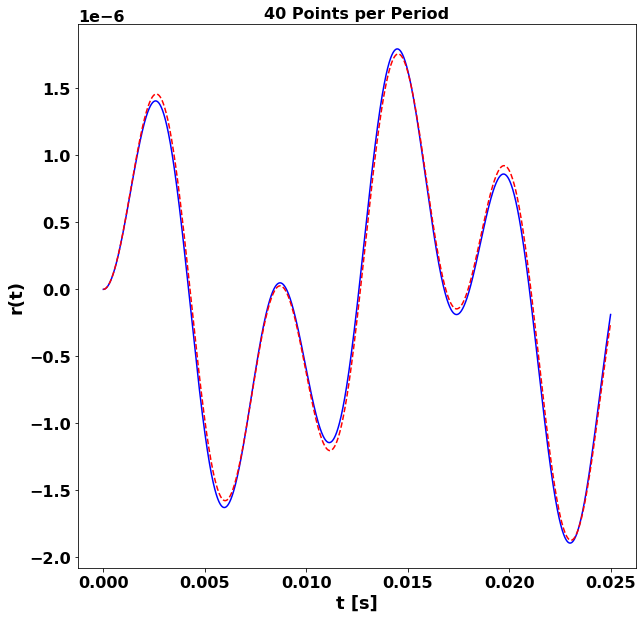

1096.1012991479456


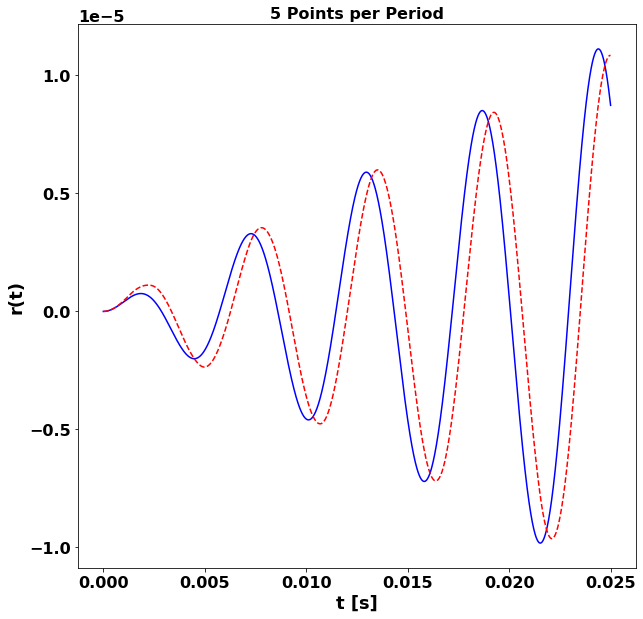

1096.1012991479456


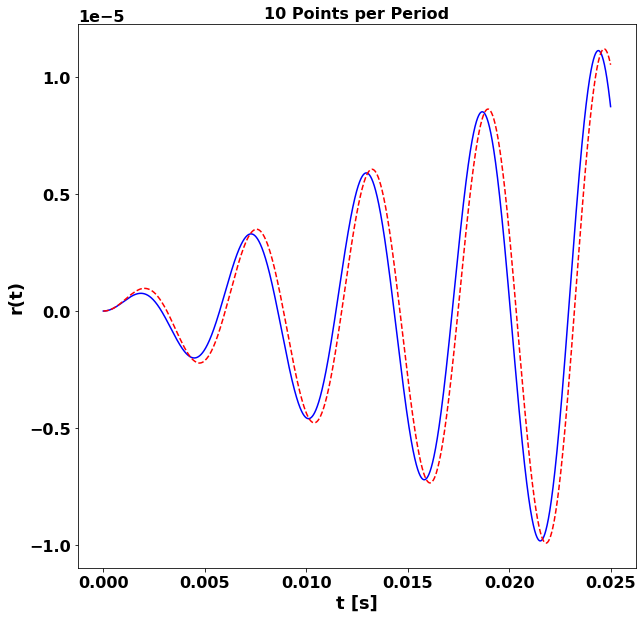

1096.1012991479456


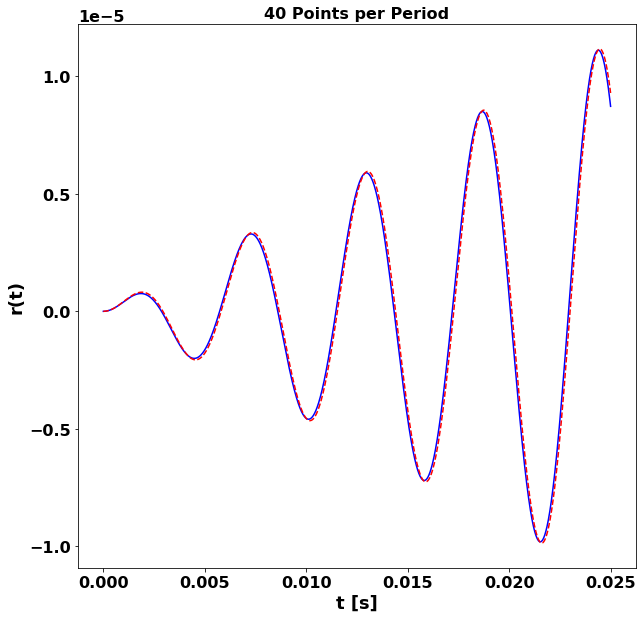

In [21]:
run(5)
run(10)
run(40)

run(5, True)
run(10, True)
run(40, True)